In [62]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import random

In [2]:
%matplotlib inline

In [3]:
original_img = cv2.imread("./val/original/2af1bd87c.jpg")

In [4]:
gen_img = cv2.imread("./val/generate/2af1bd87c.jpg", 0)

In [5]:
label_img = cv2.imread("./val/label/2af1bd87c.jpg", 0)

In [131]:
_, gen_img = cv2.threshold(gen_img, 127, 255, cv2.THRESH_BINARY)
nLabels, genImage = cv2.connectedComponents(gen_img)

In [135]:
genImage.shape

(256, 256)

In [168]:
dst = np.zeros_like(gen_img)
height, width = gen_img.shape[:2]
for y in range(0, height):
    for x in range(0, width):
        if genImage[y, x] == 3:
            dst[y, x] = 255
        else:
             dst[y, x] = 0

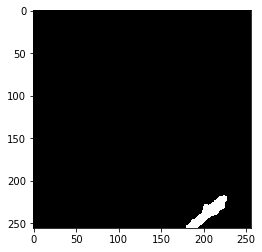

In [169]:
plt.imshow(dst)

In [170]:
_, contours, _ = cv2.findContours(dst, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [171]:
img0 = np.zeros_like(dst)

In [172]:
img = cv2.drawContours(img0, contours, -1, 255, cv2.CHAIN_APPROX_SIMPLE)

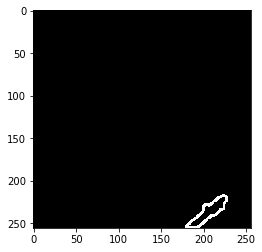

In [173]:
plt.imshow(img)

In [203]:
rect = cv2.minAreaRect(contours[0])
box = cv2.boxPoints(rect)
box = np.int0(box)
img0 = np.zeros_like(dst)
im = cv2.drawContours(img0,[box],0,255,2)

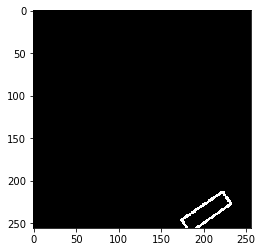

In [204]:
plt.imshow(im)

In [176]:
im.shape

(256, 256)

In [215]:
epsilon = 0.02*cv2.arcLength(contours[0],True)
approx = cv2.approxPolyDP(contours[0],epsilon,True)
img0 = np.zeros_like(gen_img)
_im = cv2.drawContours(img0,[approx],0,255,2)

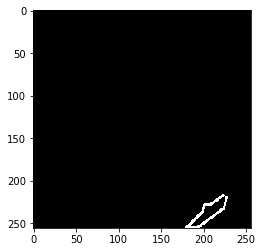

In [216]:
plt.imshow(_im)

In [219]:
img0 = np.zeros_like(gen_img)
fill_img = cv2.fillConvexPoly(img0, approx, 255)

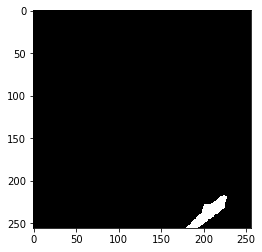

In [220]:
plt.imshow(fill_img)